In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import shuffle

In [2]:
# Load the train and test data
train_file_path = 'train_data.csv'
test_file_path = 'test_data.csv'

In [3]:
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [4]:
# Reduce dataset size for testing (optional)
train_data = shuffle(train_data).sample(frac=0.1, random_state=42)
test_data = shuffle(test_data).sample(frac=0.1, random_state=42)

In [5]:
# the dataset has 'comment' and 'label' columns
X_train = train_data['comment']
y_train = train_data['label']
X_test = test_data['comment']
y_test = test_data['label']

In [6]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
# Define the Random Forest model
rf = RandomForestClassifier()

In [8]:
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [9]:
# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=20,
                                   cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [10]:
# Get the best model from random search
best_rf = random_search.best_estimator_

In [11]:
# Evaluate the best model on the test data
y_pred = best_rf.predict(X_test_tfidf)
report = classification_report(y_test, y_pred, output_dict=True)

In [12]:
# Display results
print(f"Best parameters found: {random_search.best_params_}")
print(f"Accuracy: {report['accuracy']}")
print(f"Precision: {report['weighted avg']['precision']}")
print(f"Recall: {report['weighted avg']['recall']}")
print(f"F1 Score: {report['weighted avg']['f1-score']}")
print(f"Support: {report['weighted avg']['support']}")
print("\n")

Best parameters found: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Accuracy: 0.662621359223301
Precision: 0.660762514895005
Recall: 0.662621359223301
F1 Score: 0.6602661322688418
Support: 412.0




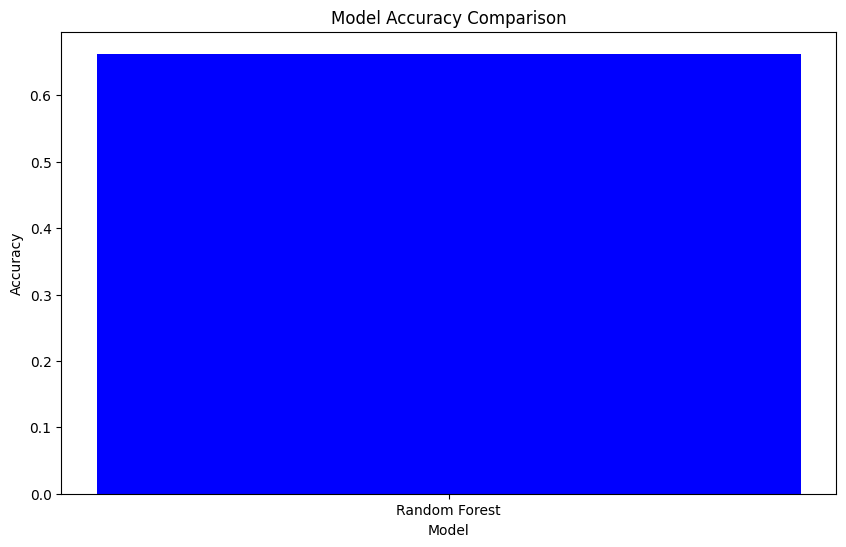

In [13]:
# Plot the accuracy of the best model
plt.figure(figsize=(10, 6))
plt.bar(['Random Forest'], [report['accuracy']], color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()